In [112]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [113]:
X,Y = make_blobs(
    n_samples=400,
    n_features=2,
    centers= 4,
    cluster_std=0.5,
    random_state=2
                )

In [114]:
plt.scatter(X[:,0],X[:,1],c = 'black',marker="*",s=50)

In [115]:
plt.grid(which='major')

In [116]:
plt.grid(which='minor')

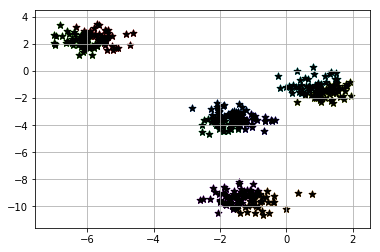

In [117]:
plt.show()


In [118]:
km = KMeans(n_clusters=3,
           )

In [146]:
km = KMeans(
    n_clusters=3,
    init="random",#セントロイドの初期値
    n_init=100,#異なるセントロイドを用いたk-meansの実行回数
    max_iter=10,#k-meansアルゴリズムを繰り返す最大回数
    tol=1e-02,#収束と判定するための誤差
    random_state=0
           )

In [147]:
Y_km = km.fit_predict(X)
#クラスターが存在するデータを渡し、各サンプルに対するクラスタ番号を求める

In [148]:
#sklearnではKMeansクラスのinertia_属性を通じてSSEの値はクラスタ内の値がどれだけ離れているかを示す
# 各データが自身の属するクラスター重心からどれほどずれているか（分散)の総和がSSEなので
#この値が小さいほどクラスタリングがうまくいっている

print("Distortion: %.2f"% km.inertia_)

Distortion: 800.02


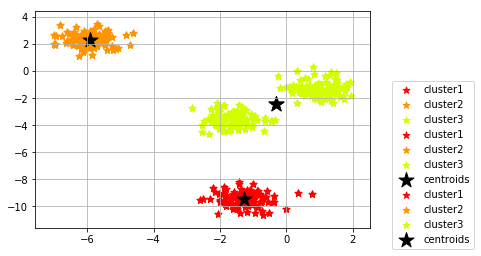

In [160]:
#クラスター番号(Y_km)に応じてデータをプロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km==n,0],X[Y_km==n,1],s=50,c= cm.hsv(float(n)/10),marker="*",label="cluster"+str(n+1))
   # plt.scatter(X[Y_km==n,0], X[Y_km==n,1], s=50, c = cm.hsv(float(n) / 10), marker="*", label="cluster"+str(n+1))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="black",label="centroids")
#km.cluster_centers_には各クラスターのセントロイドの座標が入っている
plt.legend(bbox_to_anchor=(1.05,0.7),loc='upper left')#locは列ラベル,atは行ラベル
#bbox_to_anchorでは, 凡例の枠の, 図全体に対する相対的な位置を決定します。
# 図全体の左下を(0, 0), 右上を(1, 1)としたタプルで与えます。
#この位置のことをアンカーと呼ぶことにします
#locはアンカー(bbox_to_anchorで指定した位置)に, 凡例の枠のどの部分を合わせるかを決定します。
#loc='upper left'ではアンカーに枠の左上を合わせ
#loc='center'では中心を合わせるなどの設定ができます
#borderaxespad borderaxespadでは
#アンカーと、locで指定した枠の部分の間の距離を設定することができます。
plt.grid()
plt.show()

In [154]:
for n in range(np.max(Y_km)+1):
    print(n)

0
1
2


In [156]:
print(max(Y_km)+1)

3


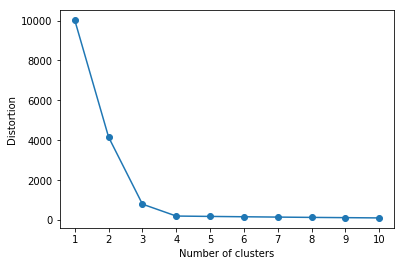

In [164]:
#エルボー法
#クラスタ数を大きくしていった時にSSEがどのように変化するかをプロットし、その結果から
#k-meansのクラスタ数を決定する手法
#SSEの値がある値からガクッと曲がる点が最適なクラスタ数
distortions = []
#inertiaとは各クラスタな内の二乗誤差
for i in range(1,11):#クラスター数1-10を計算
    km = KMeans(
        n_clusters=i,
        init="k-means++",#k-means++法によりクラスタ中心を計算
        n_init=10,
        max_iter=300,
        random_state=0
               )
    km.fit(X) #km.fitするとkm.inertia_が得られる
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [165]:
print ('Distortion: %.2f'% km.inertia_)

Distortion: 109.86
